In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('imputted_features.csv', index_col =0)
df

,fio2,plt,bradycardia,heart_rate,level_o2sat,respiration_description_Absent,respiration_description_Normal,respiration_description_On Vent,respiration_description_Other: Periodic,respiration_description_Other: periodic,...,level_o2flow_2 LPM,level_o2flow_3 LPM,level_o2flow_Other:,level_o2flow_other,bowel_sounds_all_quadrants_Absent,bowel_sounds_all_quadrants_Hyperactive,bowel_sounds_all_quadrants_Hypoactive,bowel_sounds_all_quadrants_Other: Unable to auscultate secondary to loud coarse breath sounds,bowel_sounds_all_quadrants_Present,bowel_sounds_all_quadrants_Unable to assess
0,32.232264,282.475293,72.291083,146.159005,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,32.232264,282.475293,72.291083,77.000000,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,32.232264,282.475293,72.291083,146.159005,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,32.232264,95.000000,72.291083,146.159005,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,32.232264,282.475293,72.291083,146.159005,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,32.232264,282.475293,72.291083,158.000000,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3777,21.000000,282.475293,74.000000,151.000000,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3778,32.232264,143.000000,72.291083,126.000000,60.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3779,25.000000,137.000000,72.291083,116.000000,75.648071,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [3]:
diagnosis = pd.read_excel('./data/diagnosis_info.xlsx')
diagnosis.describe()

,PT_ID,VISIT_ID,SOURCE_VOCABULARY_CD
count,41627.000000,41627.000000,4.162700e+04
mean,1419.071564,1435.071132,2.009213e+07
std,957.224050,976.825178,2.268852e+07
min,1.000000,1.000000,0.000000e+00
25%,664.000000,683.000000,1.670635e+07
50%,1206.000000,1214.000000,1.670635e+07
75%,2041.000000,2077.000000,1.670635e+07
max,3781.000000,3835.000000,1.482638e+08


In [4]:
positive_diagnosis = diagnosis[diagnosis['SOURCE_STRING']
          .str.contains(r'[Nn]ecrotizing [Ee]nterocolitis|[Ss]epsis|[Gg]astroenteritis|[Cc]olitis|[Pp]eritonitis', 
                        regex=True, na=False)]
positive_diagnosis


,PT_ID,VISIT_ID,SOURCE_STRING,SOURCE_IDENTIFIER,SOURCE_VOCABULARY_CD,CONCEPT_CKI,BEG_EFFECTIVE_DT_TM,END_EFFECTIVE_DT_TM,ONSET_DT_TM
124,151,133,Sepsis,995.91,8862,ICD9CM!995.91,2010-06-09 10:38:34,2014-10-16 22:07:45,2010-04-28 04:00:00
451,520,506,Gastroenteritis,42550011,16706354,SNOMED!25374005,2012-03-15 21:40:01,2014-11-21 22:12:41,2012-03-15 05:00:00
515,582,571,Sepsis of newborn due to Staphylococcus aureus,316480012,16706354,SNOMED!206378006,2014-11-09 22:13:38,2101-01-04 00:00:00,2011-09-08 04:00:00
560,612,601,Sepsis,151281010,16706354,SNOMED!91302008,2011-12-22 23:26:12,2013-10-31 16:55:08,2011-12-08 05:00:00
602,640,629,Culture-negative sepsis,356986013,16706354,SNOMED!238149007,2015-03-26 17:38:22,2101-01-21 23:59:59,2011-11-14 04:00:00
...,...,...,...,...,...,...,...,...,...
40868,1743,1755,Necrotizing enterocolitis in fetus OR newborn,5586012,16706354,SNOMED!2707005,2014-12-27 18:47:06,2015-01-07 16:40:35,NaT
40875,1759,1772,Clinical sepsis,2900944019,16706354,SNOMED!447931005,2014-12-02 16:24:29,2100-12-02 23:59:59,NaT
41366,2865,2941,Sepsis due to Candida,2901596018,16706354,SNOMED!447841007,2018-03-05 14:33:48,2100-12-20 23:59:59,NaT
41517,3426,3476,Necrotizing enterocolitis in fetus OR newborn,5586012,16706354,SNOMED!2707005,2019-08-04 19:29:42,2019-08-04 19:30:59,NaT


In [5]:
positive_patients = list(positive_diagnosis['PT_ID'].unique())
positive_patients

[151,
 520,
 582,
 612,
 640,
 671,
 853,
 867,
 968,
 1012,
 3246,
 211,
 321,
 324,
 965,
 980,
 1085,
 1508,
 1816,
 2387,
 3527,
 129,
 141,
 144,
 222,
 289,
 536,
 656,
 714,
 811,
 1021,
 1278,
 1989,
 3736,
 701,
 809,
 1182,
 1544,
 1571,
 2414,
 3426,
 3531,
 3622,
 3646,
 3748,
 297,
 754,
 783,
 1034,
 1232,
 1759,
 2029,
 396,
 868,
 913,
 977,
 1556,
 2785,
 1743,
 2776,
 795,
 966,
 1101,
 2248,
 3232,
 760,
 1041,
 1072,
 1493,
 1581,
 81,
 807,
 1267,
 1360,
 3474,
 803,
 893,
 999,
 1580,
 1754,
 2004,
 2087,
 2370,
 2827,
 1775,
 1928,
 2910,
 352,
 2503,
 2766,
 3133,
 2419,
 2865,
 350,
 1322]

In [6]:
labels = [1 if pt in positive_patients else 0 for pt in df.index]
df['labels'] = pd.Series(labels)

In [7]:
df[df['labels'] == 1]

,fio2,plt,bradycardia,heart_rate,level_o2sat,respiration_description_Absent,respiration_description_Normal,respiration_description_On Vent,respiration_description_Other: Periodic,respiration_description_Other: periodic,...,level_o2flow_3 LPM,level_o2flow_Other:,level_o2flow_other,bowel_sounds_all_quadrants_Absent,bowel_sounds_all_quadrants_Hyperactive,bowel_sounds_all_quadrants_Hypoactive,bowel_sounds_all_quadrants_Other: Unable to auscultate secondary to loud coarse breath sounds,bowel_sounds_all_quadrants_Present,bowel_sounds_all_quadrants_Unable to assess,labels
81,32.232264,255.000000,72.291083,146.159005,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
129,32.232264,282.475293,72.291083,132.000000,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
141,32.232264,342.000000,72.291083,198.000000,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
144,32.232264,209.000000,72.291083,174.000000,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
151,32.232264,298.000000,72.291083,176.000000,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,21.000000,282.475293,72.291083,133.000000,75.648071,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3622,21.000000,282.475293,77.000000,202.000000,81.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3646,32.232264,273.000000,68.000000,163.000000,73.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3736,21.000000,396.000000,80.000000,147.000000,81.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [8]:
labels = df.pop('labels')

In [9]:
from sklearn.model_selection import train_test_split
# 70% train set, 20% test set, 10% validation set
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size = .2, stratify = labels, random_state = 10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .125)

# Decision Tree

In [10]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

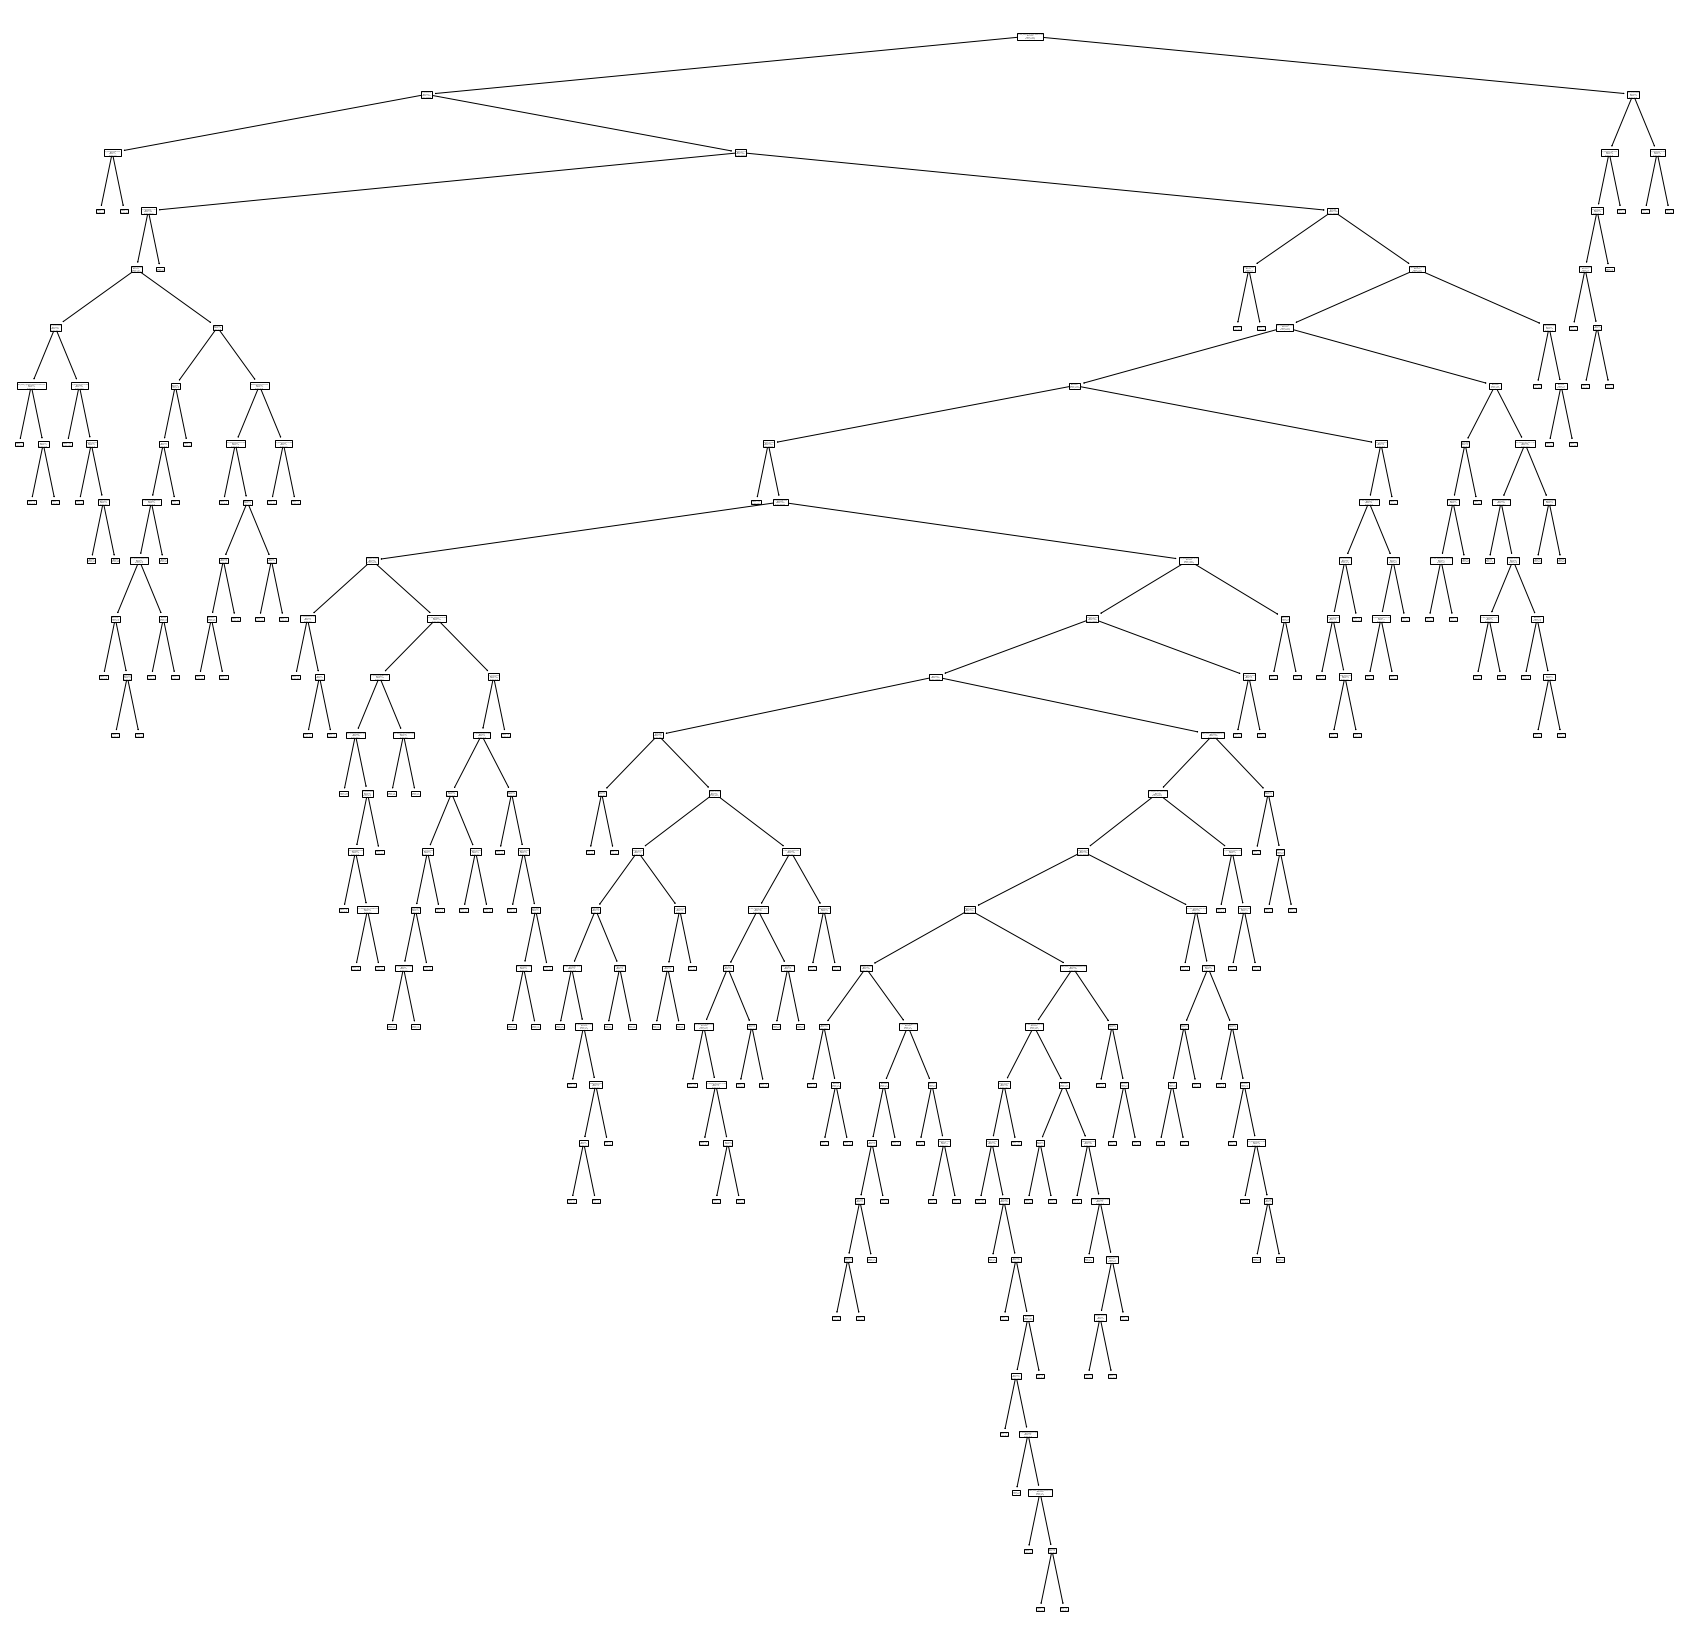

In [11]:
plt.figure(figsize=(30,30))
tree.plot_tree(dt, feature_names = df.columns)
plt.show()

# SVM

In [12]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.base import clone
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

In [20]:
def get_grid(estimator, parameter_grid, df, labels):
    steps = [
            #  ('Scaler', StandardScaler()),
#              ('oversampling', SMOTE(random_state=42, sampling_strategy = 'minority', n_jobs = -1)),
#              ('undersampling',TomekLinks(random_state=42, sampling_strategy = 'all')),
             estimator]
    pipeline = Pipeline(steps, verbose = True)
    grid = GridSearchCV(pipeline, param_grid=parameter_grid, cv=5, verbose = 10, n_jobs = -1)
    grid.fit(df, labels)
    return grid

In [21]:
def run_model(pipeline,data, labels):
    pred = cross_val_predict(pipeline,X=data,y=labels,cv=5, verbose = 10, n_jobs = -1)
    return pred

In [22]:
def display_metrics(cms):
    mcc_total = 0
    tp_total = 0
    print('TN: %s\nFP: %s\nFN: %s\nTP: %s'% tuple(cms.ravel()))
    TN,FP,FN,TP = cms.ravel()
    tp_total += TP
    SENS = 100*TP / (TP + FN) 
    SPEC = 100*TN / (TN + FP) 
    predictiveACC = 100* (TP+TN) / (TP+FP+TN+FN)
    denominator = (TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)
    MCC = (TP*TN - FP*FN) / denominator**(1/2)
    if denominator != 0:
        mcc_total += MCC
    else:
        mcc_total += 0
    print('Sensitivity:', SENS)
    print('Specificity:', SPEC)
    print('predictiveACC:', predictiveACC)
    print('MCC:', MCC)


In [23]:
parameter_grid = {'SVM__C':[.1,1,10, 100,1000], 'SVM__gamma':[0.1,0.01, 'auto', 'scale']}
estimator = ('SVM', SVC())
grid = get_grid(estimator, parameter_grid, x_val, y_val)
pipeline = grid.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0264s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1481s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.4s remaining:    0.1s
[Pipeline] ............... (step 1 of 1) Processing SVM, total=   0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [24]:
svm_clf = clone(pipeline)
svm_clf.fit(x_train, y_train)
# predictions = run_model(clone(pipeline), x_train, y_train)
predictions = svm_clf.predict(x_test)

[Pipeline] ............... (step 1 of 1) Processing SVM, total=   0.6s


In [25]:
display_metrics(confusion_matrix(y_test, predictions))

TN: 738
FP: 0
FN: 19
TP: 0
Sensitivity: 0.0
Specificity: 100.0
predictiveACC: 97.49009247027742
MCC: nan
